In [9]:
# Importation of the dataset
import pandas as pd
curve_trx_from_to_path = 'curve_trx_from_to.csv'  
veCRV_20holders_path = 'veCRV_20holders.csv'      
curve_trx_from_to = pd.read_csv(curve_trx_from_to_path)
veCRV_20holders = pd.read_csv(veCRV_20holders_path)






C:\Users\Badr\AppData\Local\Temp\ipykernel_16720\3205125710.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  curve_trx_from_to = pd.read_csv(curve_trx_from_to_path)


In [10]:
curve_trx_from_to.dtypes

Unnamed: 0             int64
blockNumber            int64
timeStamp              int64
hash                  object
nonce                  int64
blockHash             object
transactionIndex       int64
from                  object
to                    object
value                float64
gas                    int64
gasPrice               int64
isError                int64
txreceipt_status       int64
input                 object
contractAddress       object
cumulativeGasUsed      int64
gasUsed                int64
confirmations          int64
methodId              object
functionName          object
dtype: object

In [11]:
veCRV_20holders.dtypes

HolderAddress            object
Balance                 float64
PendingBalanceUpdate     object
dtype: object

# Data cleaning

In [12]:
# For the curve_trx_from_to dataset
missing_values_curve_trx = curve_trx_from_to.isna().sum()
print("Missing values in curve_trx_from_to dataset:")
print(missing_values_curve_trx)

Missing values in curve_trx_from_to dataset:
Unnamed: 0                 0
blockNumber                0
timeStamp                  0
hash                       0
nonce                      0
blockHash                  0
transactionIndex           0
from                       0
to                         1
value                      0
gas                        0
gasPrice                   0
isError                    0
txreceipt_status           0
input                      0
contractAddress      1011653
cumulativeGasUsed          0
gasUsed                    0
confirmations              0
methodId                   0
functionName             241
dtype: int64


In [15]:
# Remove the row where the 'to' variable is missing in curve_trx_from_to dataset
curve_trx_from_to_cleaned = curve_trx_from_to.dropna(subset=['to'])

In [16]:
# Replace missing values in object columns with "Unknown"
object_columns = curve_trx_from_to_cleaned.select_dtypes(include=['object']).columns
curve_trx_from_to_cleaned[object_columns] = curve_trx_from_to_cleaned[object_columns].fillna('Unknown')


C:\Users\Badr\AppData\Local\Temp\ipykernel_16720\3959577012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curve_trx_from_to_cleaned[object_columns] = curve_trx_from_to_cleaned[object_columns].fillna('Unknown')


In [17]:
# For the curve_trx_from_to dataset
missing_values_curve_trx = curve_trx_from_to_cleaned.isna().sum()
print("Missing values in curve_trx_from_to dataset:")
print(missing_values_curve_trx)

Missing values in curve_trx_from_to dataset:
Unnamed: 0           0
blockNumber          0
timeStamp            0
hash                 0
nonce                0
blockHash            0
transactionIndex     0
from                 0
to                   0
value                0
gas                  0
gasPrice             0
isError              0
txreceipt_status     0
input                0
contractAddress      0
cumulativeGasUsed    0
gasUsed              0
confirmations        0
methodId             0
functionName         0
dtype: int64


Our dataset is clean now from missing values

In [14]:
# For the veCRV_20holders dataset
missing_values_veCRV = veCRV_20holders.isna().sum()
print("\nMissing values in veCRV_20holders dataset:")
print(missing_values_veCRV)


Missing values in veCRV_20holders dataset:
HolderAddress           0
Balance                 0
PendingBalanceUpdate    0
dtype: int64


Our dataset is clean from missing values

# Descriptive statistics

In [18]:
# Descriptive statistics for GasPrice and cumulativeGasUsed in curve_trx_from_to_cleaned
print("Descriptive Statistics for GasPrice and cumulativeGasUsed:")
print(curve_trx_from_to_cleaned[['gasPrice', 'cumulativeGasUsed']].describe())

Descriptive Statistics for GasPrice and cumulativeGasUsed:
           gasPrice  cumulativeGasUsed
count  1.011653e+06       1.011653e+06
mean   8.657835e+10       7.338178e+06
std    8.896679e+10       5.982407e+06
min    0.000000e+00       1.455400e+04
25%    2.571250e+10       2.775428e+06
50%    6.000000e+10       5.889014e+06
75%    1.194133e+11       1.039041e+07
max    6.074875e+12       3.013274e+07


### Descriptive Statistics Analysis: `gasPrice` and `cumulativeGasUsed`

- **`gasPrice`**:
  - **Count**: There are over 1 million entries (1,011,653 to be exact), indicating a substantial dataset.
  - **Mean**: The average gas price is approximately 86.58 billion, suggesting that the typical cost for transactions is quite high.
  - **Standard Deviation**: A standard deviation of about 88.97 billion indicates a wide variance in gas prices, implying significant fluctuations over time or across transactions.
  - **Minimum**: The minimum gas price is 0, which could indicate some transactions didn't require a gas fee or are anomalies.
  - **Quartiles**:
    - **25%**: The first quartile is around 25.71 billion, indicating that 25% of the transactions have a gas price lower than this value.
    - **50% (Median)**: The median is 60 billion, which is less than the mean, suggesting a right-skewed distribution.
    - **75%**: The third quartile is around 119.41 billion, showing that 75% of the transactions have a gas price lower than this value.
  - **Maximum**: The maximum gas price is extremely high at approximately 6.07 trillion, which could be due to outliers or exceptional cases in the dataset.

- **`cumulativeGasUsed`**:
  - **Count**: Similar to `gasPrice`, there are over 1 million entries.
  - **Mean**: The mean cumulative gas used is about 7.34 million, indicating a moderate level of gas consumption on average.
  - **Standard Deviation**: A standard deviation of approximately 5.98 million shows a substantial spread in the cumulative gas used, suggesting diverse transaction complexities or network conditions.
  - **Minimum**: The minimum value is 14,554, which might represent simple transactions.
  - **Quartiles**:
    - **25%**: The first quartile is approximately 2.78 million, showing that 25% of the transactions used less gas than this.
    - **50% (Median)**: The median is around 5.89 million, closer to the first quartile, indicating a right-skewed distribution.
    - **75%**: The third quartile is about 10.39 million, suggesting that 75% of the transactions consumed less gas than this amount.
  - **Maximum**: The maximum cumulative gas used is around 30.13 million, which might be due to particularly complex transactions or anomalies.


In [19]:
# Descriptive statistics for Balance in veCRV_20holders
print("\nDescriptive Statistics for Balance in veCRV_20holders:")
print(veCRV_20holders['Balance'].describe())


Descriptive Statistics for Balance in veCRV_20holders:
count    9.010000e+03
mean     7.103348e+04
std      3.480208e+06
min      0.000000e+00
25%      9.050000e+00
50%      1.261900e+02
75%      1.234760e+03
max      3.140883e+08
Name: Balance, dtype: float64


### Descriptive Statistics Analysis: `Balance` in `veCRV_20holders`

- **Count**: The dataset contains 9,010 entries, representing a large number of veCRV wallet holders.
- **Mean**: The average balance across these holders is approximately 71,033.48, suggesting a relatively high average balance in the dataset.
- **Standard Deviation**: A very high standard deviation of about 3,480,208 indicates a significant variation in balances among the wallet holders, pointing to a highly diverse set of values.
- **Minimum**: The minimum balance is 0, which could mean that some wallet holders currently have no veCRV tokens.
- **Quartiles**:
  - **25%**: The first quartile is 9.05, indicating that 25% of the wallet holders have a balance lower than this value, reflecting many holders with minimal token amounts.
  - **50% (Median)**: The median balance is 126.19, which is much lower than the mean, indicating a highly right-skewed distribution, where most holders have balances much lower than the average.
  - **75%**: The third quartile is 1,234.76, showing that 75% of the holders have balances below this level.
- **Maximum**: The maximum balance is extremely high at about 314,088,300, likely representing outliers or very large holders, which significantly influence the average balance and create a skewed distribution.


# Histogram of Gas Prices

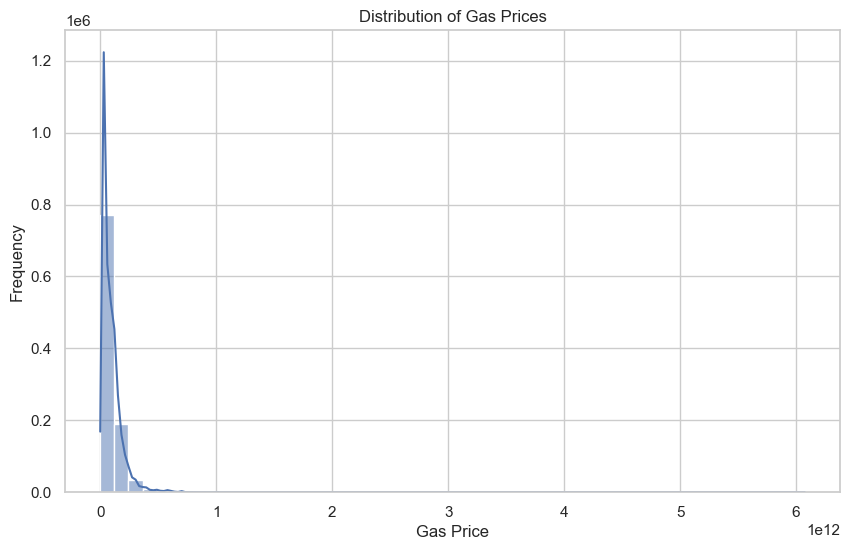

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Histogram of Gas Prices
plt.figure(figsize=(10, 6))
sns.histplot(curve_trx_from_to_cleaned['gasPrice'], bins=50, kde=True)
plt.title('Distribution of Gas Prices')
plt.xlabel('Gas Price')
plt.ylabel('Frequency')
plt.show()

# Histogram of cumulativeGasUsed

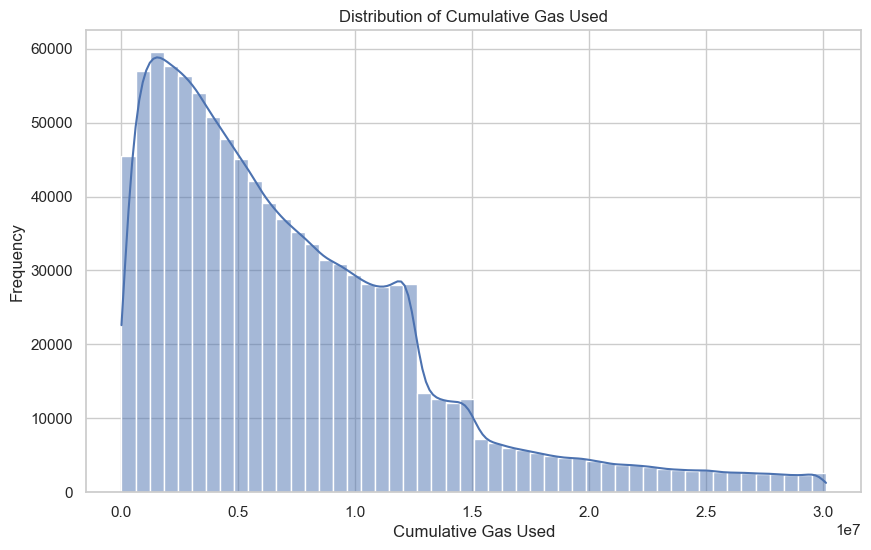

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(curve_trx_from_to_cleaned['cumulativeGasUsed'], bins=50, kde=True)
plt.title('Distribution of Cumulative Gas Used')
plt.xlabel('Cumulative Gas Used')
plt.ylabel('Frequency')
plt.show()

# Histogram of veCRV Holder Balances

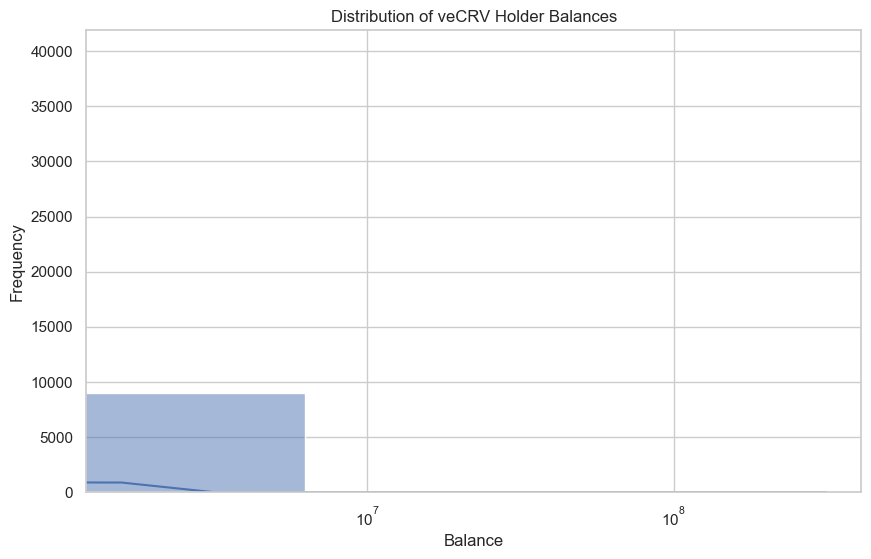

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(veCRV_20holders['Balance'], bins=50, kde=True)
plt.title('Distribution of veCRV Holder Balances')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.xscale('log')  # Using a log scale due to wide range of balances
plt.show()

# Scatter plot of Gas Price vs. Cumulative Gas Used


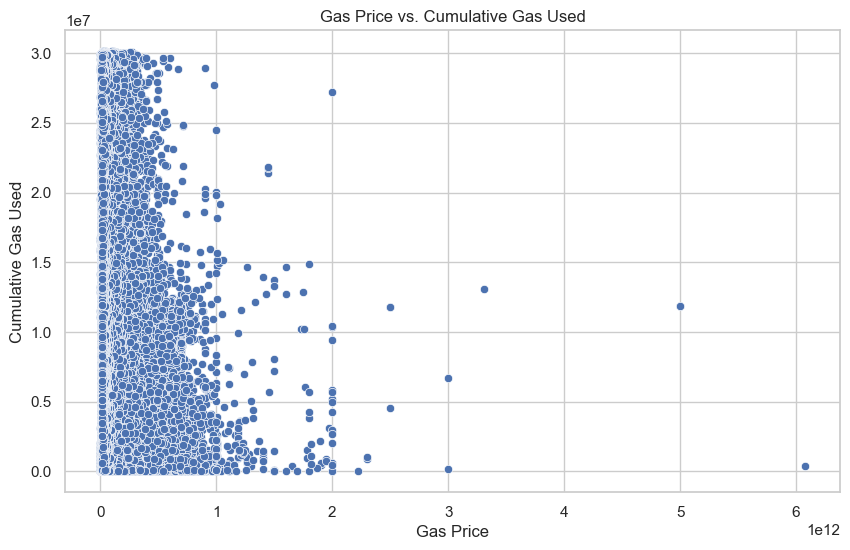

In [23]:
# Scatter plot of Gas Price vs. Cumulative Gas Used
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gasPrice', y='cumulativeGasUsed', data=curve_trx_from_to_cleaned)
plt.title('Gas Price vs. Cumulative Gas Used')
plt.xlabel('Gas Price')
plt.ylabel('Cumulative Gas Used')
plt.show()

# Time Series Plot of Gas Prices

C:\Users\Badr\AppData\Local\Temp\ipykernel_16720\2357505489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curve_trx_from_to_cleaned['timeStamp'] = pd.to_datetime(curve_trx_from_to_cleaned['timeStamp'], unit='s')


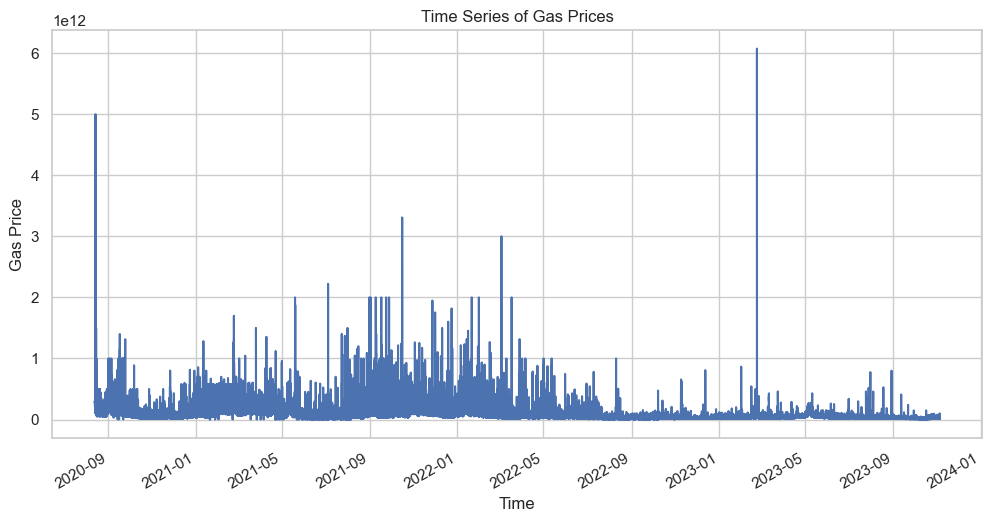

In [24]:
curve_trx_from_to_cleaned['timeStamp'] = pd.to_datetime(curve_trx_from_to_cleaned['timeStamp'], unit='s')
plt.figure(figsize=(12, 6))
curve_trx_from_to_cleaned.set_index('timeStamp')['gasPrice'].plot()
plt.title('Time Series of Gas Prices')
plt.xlabel('Time')
plt.ylabel('Gas Price')
plt.show()


# Box Plot for Transaction Values


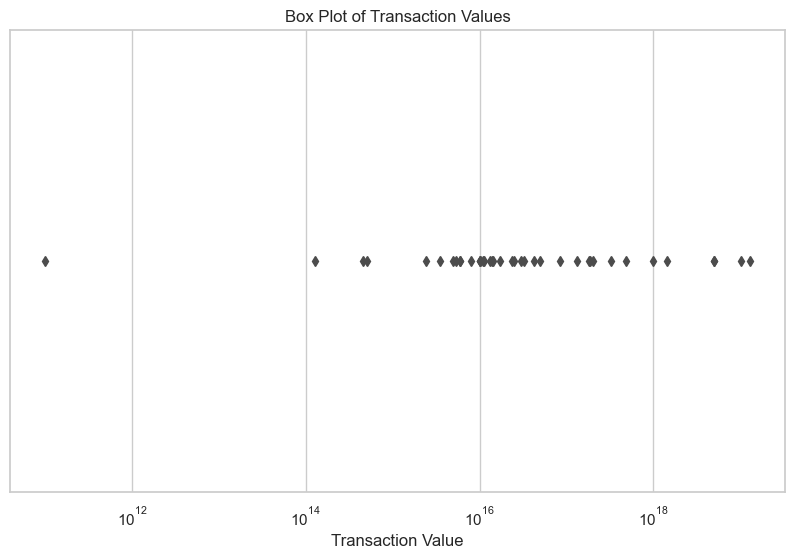

In [25]:
# Box Plot for Transaction Values
plt.figure(figsize=(10, 6))
sns.boxplot(x=curve_trx_from_to_cleaned['value'])
plt.title('Box Plot of Transaction Values')
plt.xlabel('Transaction Value')
plt.xscale('log')  # Using a log scale due to wide range of transaction values
plt.show()

# Distribution of Balances in Different Balance Ranges


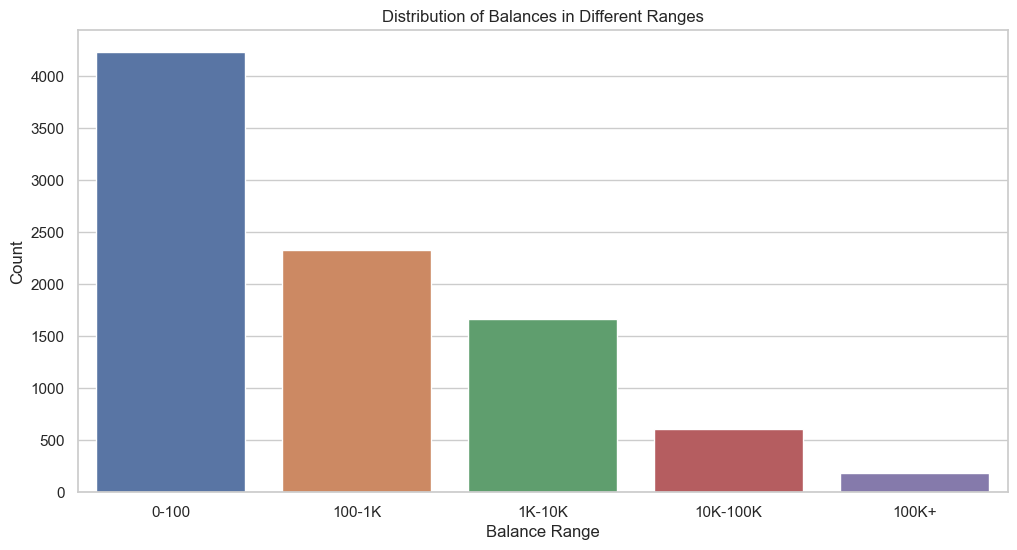

In [26]:
veCRV_20holders['Balance Range'] = pd.cut(veCRV_20holders['Balance'], bins=[0, 100, 1000, 10000, 100000, 1e8], labels=['0-100', '100-1K', '1K-10K', '10K-100K', '100K+'])
plt.figure(figsize=(12, 6))
sns.countplot(x='Balance Range', data=veCRV_20holders)
plt.title('Distribution of Balances in Different Ranges')
plt.xlabel('Balance Range')
plt.ylabel('Count')
plt.show()


# Discussions about the EDA


## Insights from Visual Data Analysis

### Distribution of veCRV Holder Balances
The balance distribution reveals a significant skew towards smaller balances, with the majority of holders having between 0-100 veCRV tokens. This suggests that while veCRV is distributed across a wide user base, the majority of users hold a relatively small stake in the governance process, which may impact decentralized decision-making.

### Time Series of Gas Prices
The time series chart of gas prices shows considerable volatility over time with sporadic spikes. These spikes can be associated with network congestion or significant events within the Curve protocol or the broader Ethereum network. Understanding these patterns can be crucial for optimizing transaction timing and for strategic decisions in using the network.

### Gas Price vs. Cumulative Gas Used
The scatter plot indicates a clustered relationship between gas price and cumulative gas used, with most transactions occurring at lower gas prices and using less gas. This might reflect the efficiency of the Curve protocol's transactions or users' tendency to transact during less busy network periods to minimize fees.

### Distribution of Cumulative Gas Used
The histogram of cumulative gas used shows a right-skewed distribution, indicating that while most transactions use a lower amount of gas, there are enough high-gas-use transactions to affect the average, suggesting that there are occasional complex transactions or smart contract interactions that require significant gas.

### Distribution of Gas Prices
The gas prices distribution is highly skewed with most of the gas prices concentrated at the lower end. It indicates that despite the presence of outliers with very high gas prices, typical transactions within the Curve ecosystem are executed with relatively low gas costs.

These insights enhance our understanding of Curve's Automated Market Maker (AMM) technology and veCRV governance, illustrating the active participation across a range of users and the implications of gas prices on transaction behavior. It underscores the role of automation in maintaining a blockchain-based global financial system, where transaction efficiency and stakeholder distribution are key components.
